In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
apps_df = pd.read_csv('googleplaystore.csv')

In [ ]:
# Clean data: Drop rows with missing or invalid ratings
apps_df = apps_df[apps_df['Rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())].copy()
apps_df.loc[:, 'Rating'] = apps_df['Rating'].astype(float)


In [ ]:
# Remove duplicates
apps_df = apps_df.drop_duplicates().copy()

# Make sure "Installs" column is string before applying string methods
apps_df['Installs'] = apps_df['Installs'].astype(str)

# Remove "+" and "," characters
apps_df['Installs'] = apps_df['Installs'].str.replace(r'[+,]', '', regex=True)

# Keep only rows where Installs are digits
apps_df = apps_df[apps_df['Installs'].str.isdigit()].copy()

# Convert Installs to int
apps_df['Installs'] = apps_df['Installs'].astype(int)


In [ ]:
# Clean "Price" column
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '')
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')


In [ ]:
# Clean "Size" column
def clean_size(value):
    try:
        value = value.strip()
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif value == 'Varies with device':
            return np.nan
        else:
            return float(value)
    except:
        return np.nan

apps_df['Size'] = apps_df['Size'].astype(str).apply(clean_size)


In [ ]:
# Normalize "Type" and drop critical NaNs
apps_df['Type'] = apps_df['Type'].fillna('Free')
apps_df.dropna(subset=['Rating', 'Installs', 'Price', 'Size'], inplace=True)


In [ ]:
# Preview cleaned data
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


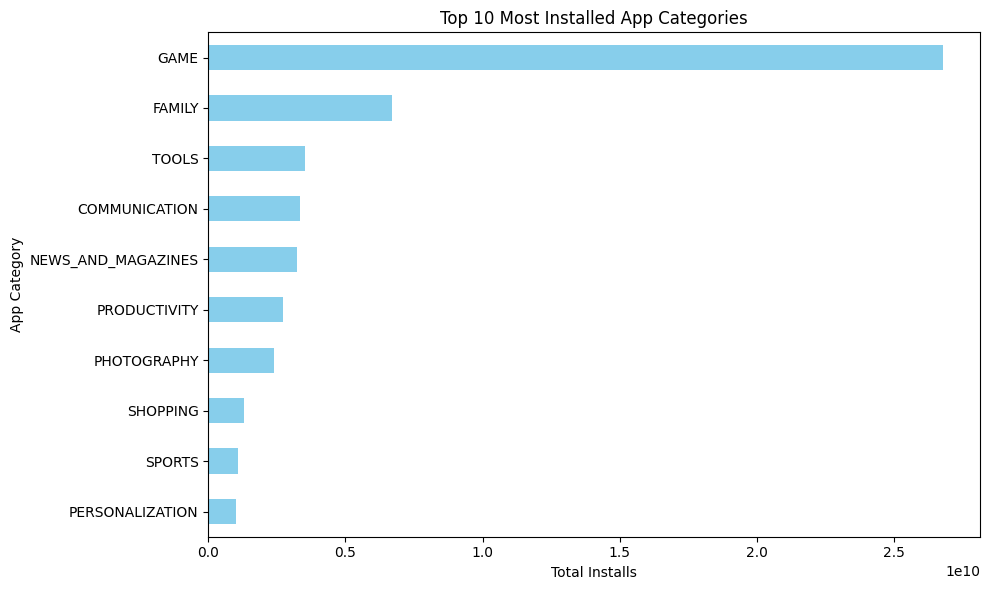

In [ ]:
# Total installs per category (Top 10)
top_installed = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_installed.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Installed App Categories')
plt.xlabel('Total Installs')
plt.ylabel('App Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 💡 Insight: Most Installed App Categories

From the visualization, it's clear that **Game** and **Family** apps dominate in terms of total installs by a large margin. Game apps, in particular, show significantly higher user adoption compared to all other categories—likely driven by frequent usage, entertainment value, and viral marketing dynamics.

Other well-performing categories include **Tools**, **Communication**, and **Productivity**, which are more utility-based and often essential for daily smartphone use. This suggests that both entertainment and utility apps are major drivers of market reach on the Play Store.


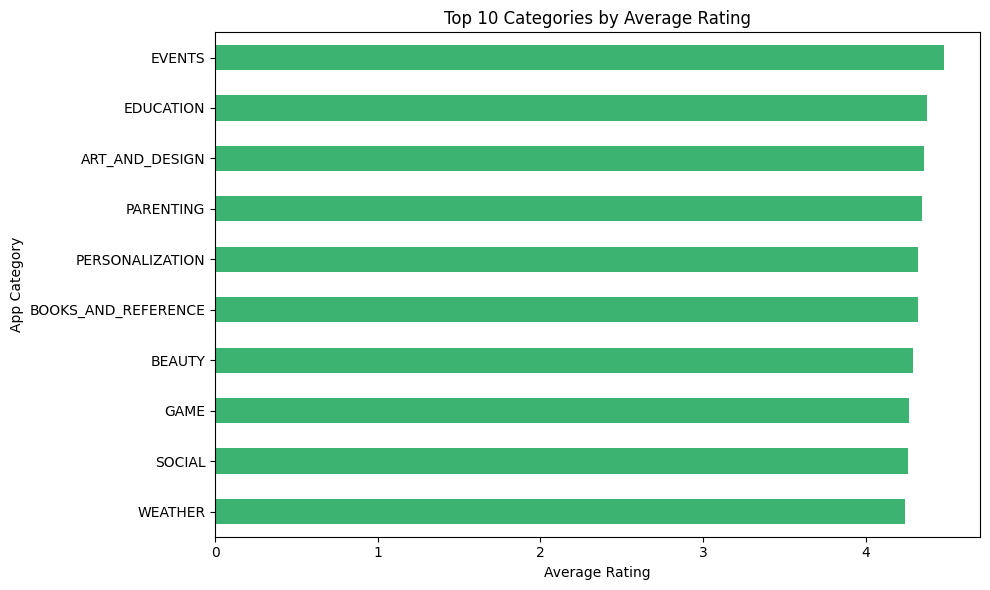

In [ ]:
# Average rating per category (Top 10)
avg_ratings = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_ratings.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('App Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 💡 Insight: Highest Rated App Categories

The top-rated categories tell a slightly different story. **Events**, **Education**, and **Art & Design** apps receive the highest average user ratings, indicating that users in these niches are more satisfied with the app experience.

Interestingly, **Parenting** and **Books & Reference** also perform well—categories that are content-heavy and likely offer strong value over time. This reveals that while categories like **Game** dominate in installs, **quality perception** is higher in more specialized or value-based app segments.

This could help inform product strategies for developers: niche apps may attract fewer users, but can still achieve high satisfaction and retention rates.


🔍 Market Trends & App Insights

📈 Business / Monetization Analysis

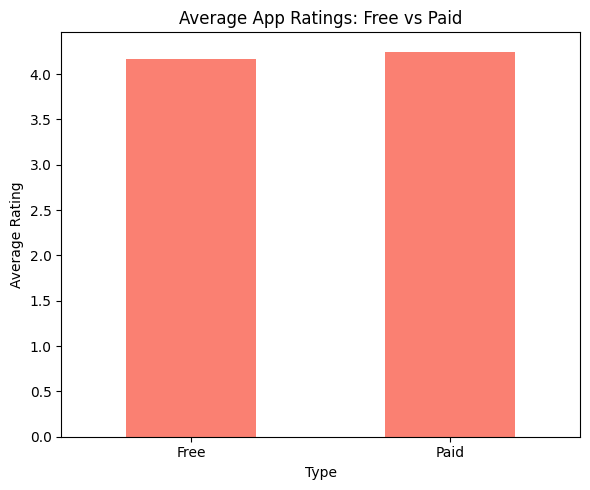

In [ ]:
# Compare average ratings of Free vs Paid apps
type_ratings = apps_df.groupby('Type')['Rating'].mean()

plt.figure(figsize=(6,5))
type_ratings.plot(kind='bar', color='salmon')
plt.title('Average App Ratings: Free vs Paid')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


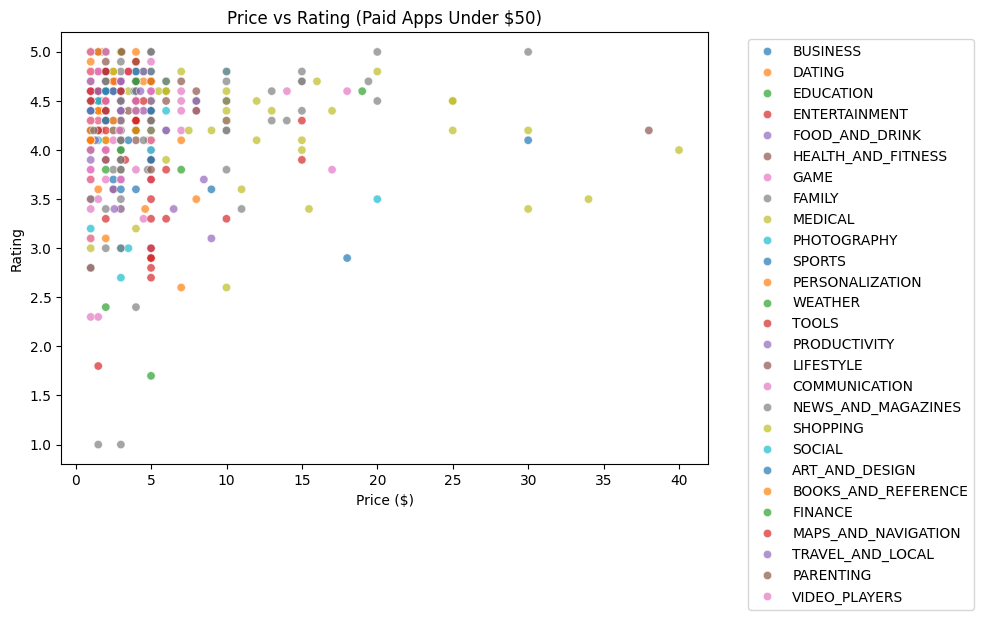

In [ ]:
# Price vs Rating for Paid apps under $50
paid_apps = apps_df[(apps_df['Type'] == 'Paid') & (apps_df['Price'] < 50)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=paid_apps, x='Price', y='Rating', hue='Category', alpha=0.7, palette='tab10')
plt.title('Price vs Rating (Paid Apps Under $50)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📊 User Behavior Analysis

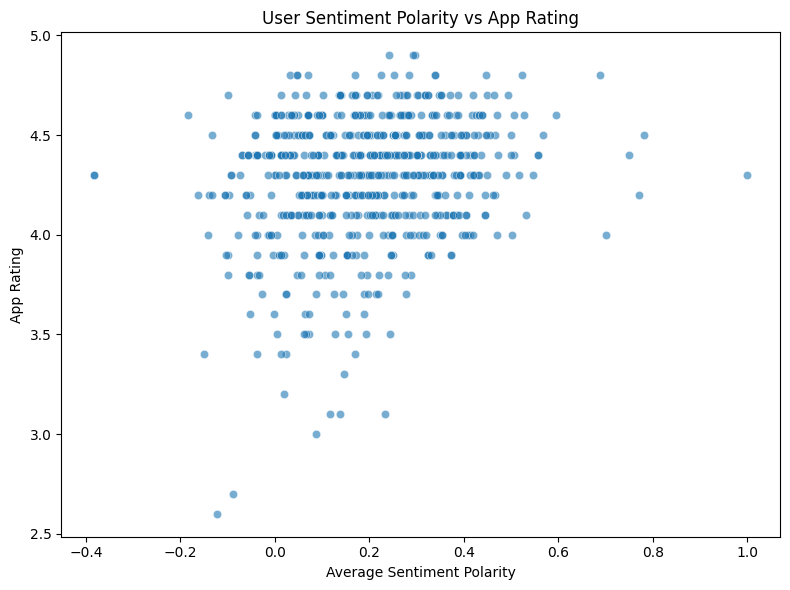

In [ ]:
# Load user reviews
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

# Drop missing sentiment data
reviews_df.dropna(subset=['Sentiment_Polarity'], inplace=True)

# Average sentiment polarity per app
avg_sentiment = reviews_df.groupby('App')['Sentiment_Polarity'].mean().reset_index()

# Merge with main app data
merged_df = pd.merge(apps_df, avg_sentiment, on='App', how='left')

# Sentiment vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='Sentiment_Polarity', y='Rating', alpha=0.6)
plt.title('User Sentiment Polarity vs App Rating')
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('App Rating')
plt.tight_layout()
plt.show()


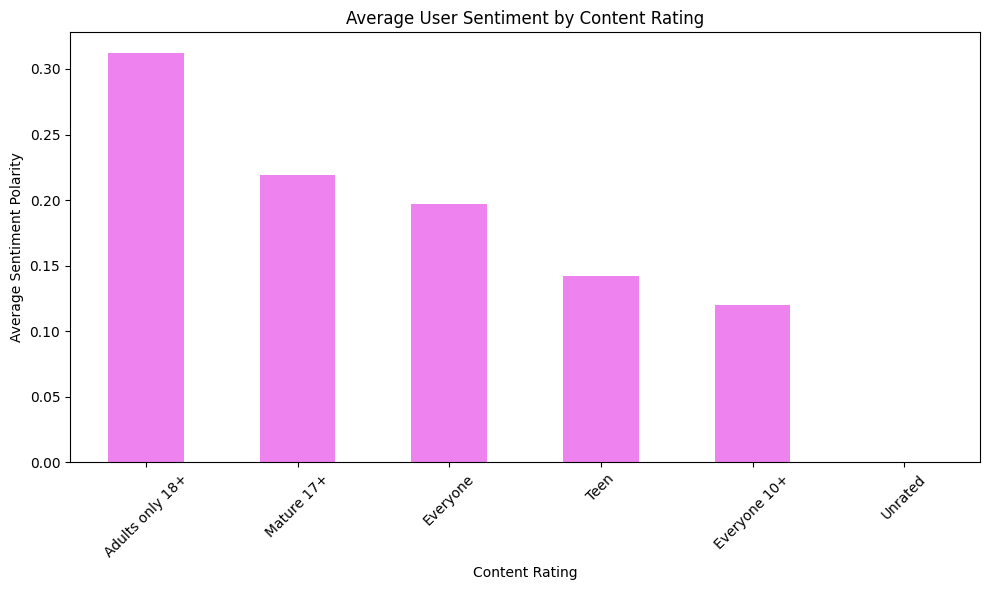

In [ ]:
# Average sentiment by content rating
content_sentiment = merged_df.groupby('Content Rating')['Sentiment_Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
content_sentiment.plot(kind='bar', color='violet')
plt.title('Average User Sentiment by Content Rating')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
